In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py

Reading the csv file and storing the data in 'dataset'.
Converting the 'dataset' to dataframe and storing in 'data'

In [2]:
dataset = pd.read_csv("Laliga.csv",header=1,index_col=0)
data = pd.DataFrame(dataset)
#dataset.head

Replacing value '-' to 0 for to make data sutiable for arithimatic operations and storing it in 'newdata'

In [3]:
newdata = data.replace(to_replace='-', value=0)
newdata.dtypes

Team             object
Seasons           int64
Points           object
GamesPlayed      object
GamesWon         object
GamesDrawn       object
GamesLost        object
GoalsFor         object
GoalsAgainst     object
Champion         object
Runner-up        object
Third            object
Fourth           object
Fifth            object
Sixth            object
T                object
Debut            object
Since/LastApp    object
BestPosition      int64
dtype: object

Converting the data types of objects to int

In [4]:
newdata = newdata.astype({"Points":int,"GamesPlayed":int,"GamesWon":int,"GamesDrawn":int,"GamesLost":int,"GoalsFor":int,"GoalsAgainst":int,"Champion":int,"Runner-up":int,"Third":int,"Fourth":int,"Fifth":int,"Sixth":int,"T":int})
newdata.dtypes

Team             object
Seasons           int64
Points            int32
GamesPlayed       int32
GamesWon          int32
GamesDrawn        int32
GamesLost         int32
GoalsFor          int32
GoalsAgainst      int32
Champion          int32
Runner-up         int32
Third             int32
Fourth            int32
Fifth             int32
Sixth             int32
T                 int32
Debut            object
Since/LastApp    object
BestPosition      int64
dtype: object

Defining functions to split the year and covert it to int data type and verify if the year is with in the range(1930-1980) 

In [5]:
def checkyear(yr):
    if yr>=1930 and yr<=1980:
            #print("year is within the range 1930-1980:"+str(yr))
            return yr
    else:
        return 0
        
def oldteams(year):
    yr = year.iloc[:,-1]
    i=0
    for y in yr:
        if '-' not in y:
            debut = int(y)
            chk = checkyear(debut)
            if chk!=0:
                print(str(year.iloc[i,0])+" debut year :"+str(debut))
            i=i+1
        else:
            rng = y.split('-')
            debut = int(rng[0])
            #print("Starting year is : "+str(debut))
            chk=checkyear(debut)
            if chk!=0:
                print(str(year.iloc[i,0])+" debut year :"+str(debut))
            i = i+1
    i=0

Create a subset containing team name and debut year.Pass this subset to the above defined function for the verification and print the output.

In [6]:
year = newdata.iloc[:,[0,-3]]
print("\t Teams which have started playing (Debuted) between 1930-1980: \t")
oldteams(year)

	 Teams which have started playing (Debuted) between 1930-1980: 	
Valencia debut year :1931
Sevilla debut year :1934
Zaragoza debut year :1939
Real Betis debut year :1932
Deportivo La Coruna debut year :1941
Celta Vigo debut year :1939
Valladolid debut year :1948
Sporting Gijon debut year :1944
Osasuna debut year :1935
Malaga debut year :1949
Oviedo debut year :1933
Mallorca debut year :1960
Las Palmas debut year :1951
Granada debut year :1941
Rayo Vallecano debut year :1977
Elche debut year :1959
Hercules debut year :1935
Tenerife debut year :1961
Murcia debut year :1940
Alaves debut year :1930
Levante debut year :1963
Salamanca debut year :1974
Sabadell debut year :1943
Cadiz debut year :1977
Castellon debut year :1941
Cordoba debut year :1962
Recreativo debut year :1978
Burgos CF debut year :1971
Pontevedra debut year :1963
Gimnastic debut year :1947
Alcoyano debut year :1945
Jaen debut year :1953
AD Almeria debut year :1979
Lleida debut year :1950
Condal debut year :1956
Atletico T

Sorting the teams in the descending order of points scored and printing the top 5 teams w.r.t points scored.

	 Top 5 teams in terms of points: 	 

                Team  Points
Pos                         
1        Real Madrid    4385
2          Barcelona    4262
3    Atletico Madrid    3442
4           Valencia    3386
5    Athletic Bilbao    3368


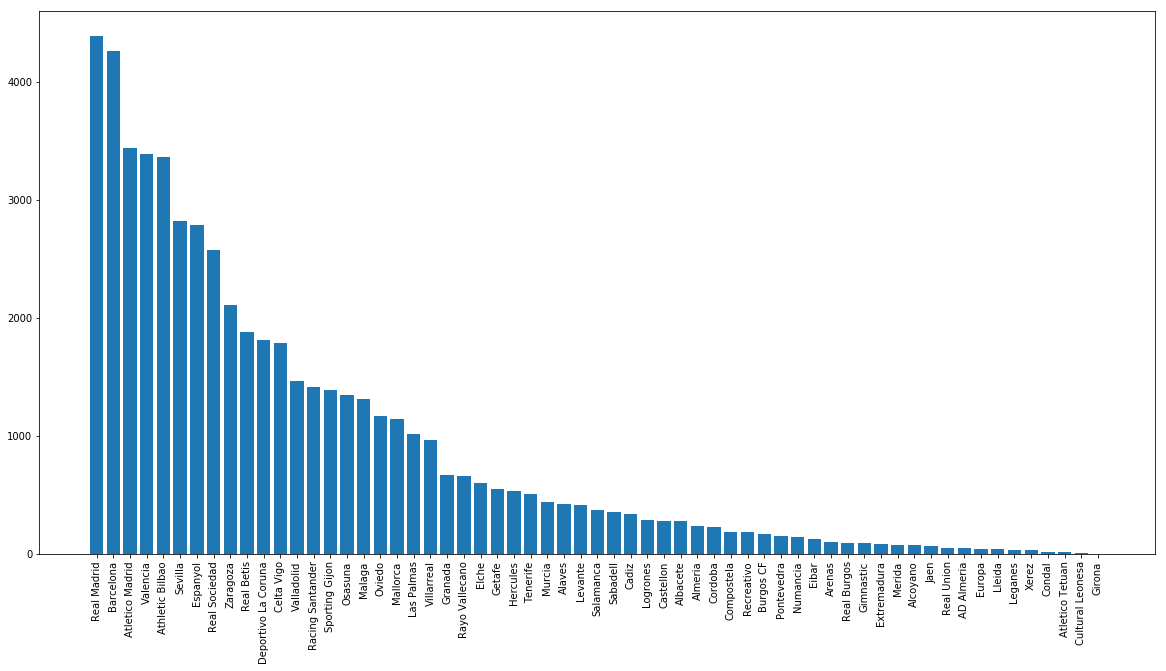

In [19]:
newdata.sort_values("Points", ascending=False)
print("\t Top 5 teams in terms of points: \t \n\n"+str(newdata.iloc[[0,1,2,3,4],[0,2]]))

py.figure(figsize=(20,10))
py.bar(newdata["Team"],newdata["Points"])
py.xticks(rotation=90)
py.show()

Creating a subset "goaldataset" to store Goal data. Adding a new column "GoalDiff" for storing the difference between 'goals for' and 'goals against'.   

    GoalsDiff = GoalsFor - GoalsAgainst
   
Printing the max and min values of GoalDiff inn the given data 

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


            Team  GoalsFor  GoalsAgainst  GoalDiff
Pos                                               
1    Real Madrid      5947          3140      2807
                 Team  GoalsFor  GoalsAgainst  GoalDiff
Pos                                                    
14   Racing Santander      1843          2368      -525


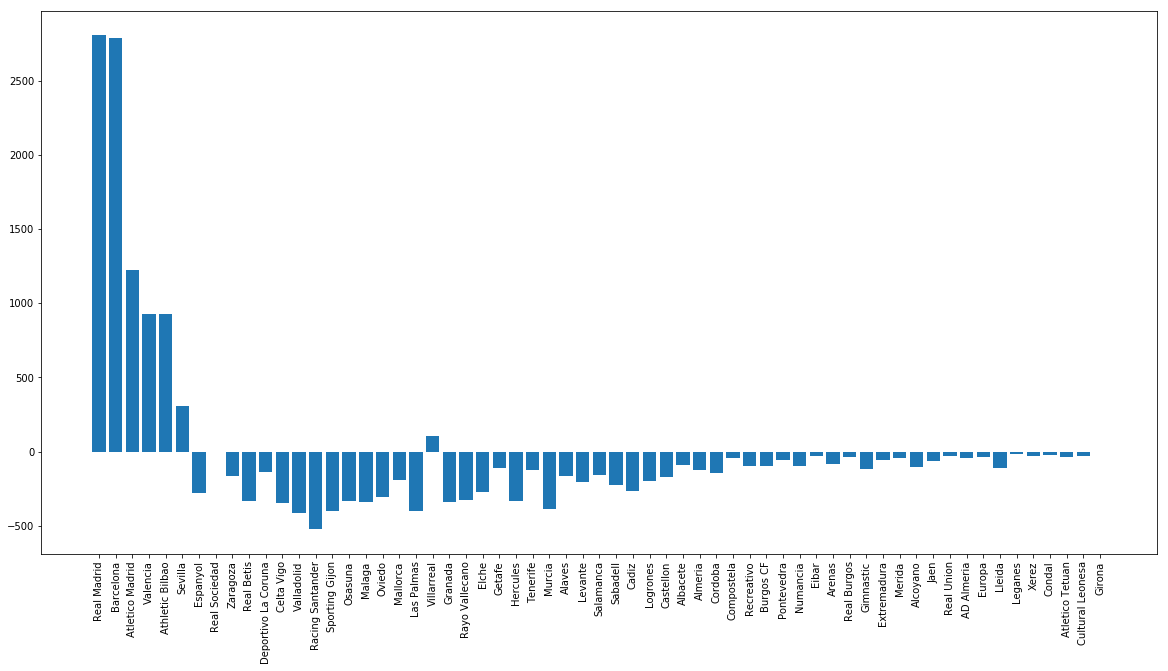

In [23]:
goaldataset = newdata[["Team","GoalsFor","GoalsAgainst"]]
goaldataset.head
def Goal_diff_count(goaldataset):
    goal_diff = goaldataset["GoalsFor"] - goaldataset["GoalsAgainst"]
    goaldataset["GoalDiff"] = goal_diff
    return goaldataset
    
goaldiffcount = Goal_diff_count(goaldataset)
print(goaldiffcount[goaldiffcount["GoalDiff"] == max(goaldiffcount["GoalDiff"])])
print(goaldiffcount[goaldiffcount["GoalDiff"] == min(goaldiffcount["GoalDiff"])])

py.figure(figsize=(20,10))
py.bar(goaldataset["Team"],goaldataset["GoalDiff"])
py.xticks(rotation=90)
py.show()

Calculating the winning percentage of each team.

    Winning Percentage = ((Number of Games Won)/(Number of Games Played))*100
    
Sort the winning percentages in descending order and printing the top 5 teams with highest winninh percentages. 

In [9]:
percentageWinning = 100*(newdata["GamesWon"]/newdata["GamesPlayed"])
newdata["PercentageWinning"] = percentageWinning
#if newdata["PercentageWinning"].isnull() is True:
cleaned_pw_data = newdata.replace(to_replace=np.nan, value = 0)
cleaned_pw_data.sort_values("PercentageWinning", ascending = False)
print(cleaned_pw_data.iloc[[0,1,2,3,4],[0,-1]])

                Team  PercentageWinning
Pos                                    
1        Real Madrid          59.630702
2          Barcelona          57.241130
3    Atletico Madrid          47.475134
4           Valencia          44.557057
5    Athletic Bilbao          43.772629


Creating a new subset containing 'BestPosition' and total 'Points' scored by all the teams in that particular position   

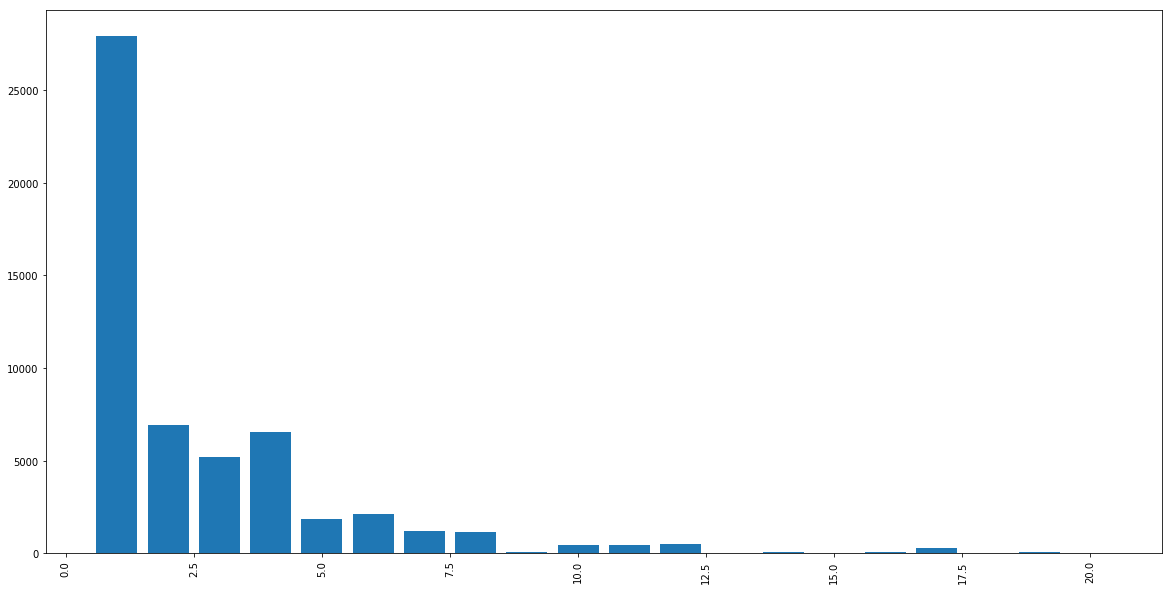

,Points
Position,
1.0,27933.0
2.0,6904.0
3.0,5221.0
4.0,6563.0
5.0,1884.0
6.0,2113.0
7.0,1186.0
8.0,1134.0
9.0,96.0


In [34]:
newdata
bpdata = newdata[["BestPosition","Points"]]
#bpgroup = bpdata.groupby(by="BestPosition")
unique_val = bpdata["BestPosition"].unique() 
unique_val.sort()
#print(unique_val.size)
x = np.array([[],[]])
for val in unique_val:
    bp = bpdata[bpdata["BestPosition"]==val]
    sumpoint = bp["Points"].sum()
    xarray = str(val)+" "+str(bp["Points"].sum())
    x = np.append(x,[[val],[sumpoint]],axis=1)
#print(x.T)
bpdataset = pd.DataFrame(x.T)
bpdataset.columns=["Position","Points"]
bpdataset.set_index("Position")
#bpdataset.astype({"Position":int,"Points":int})
bpdataset.reset_index
bp = bpdataset.set_index("Position")

py.figure(figsize=(20,10))
py.bar(bpdataset["Position"],bpdataset["Points"])
py.xticks(rotation=90)
py.show()

bp.head(20)